# Final Evaluation of the models

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import numpy as np

import matplotlib.pyplot as plt
import tensorflow.keras as keras

import sys
sys.path.insert(0, "../Src/")
import loadData
import trainModel as tm
import visualization as viz

%autosave 5

Autosaving every 5 seconds


Autosaving every 5 seconds


Autosaving every 5 seconds


In [2]:
data = loadData.loadData('MSFT')


[*********************100%***********************]  1 of 1 completed


## Autoregression

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


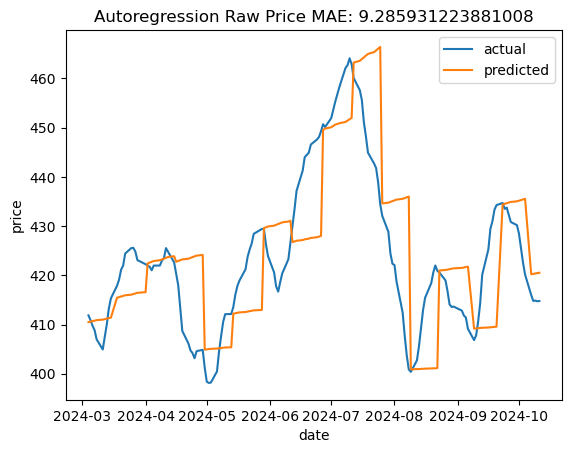

Autoregression Raw Price MAE: 9.285931223881008


<Figure size 640x480 with 0 Axes>

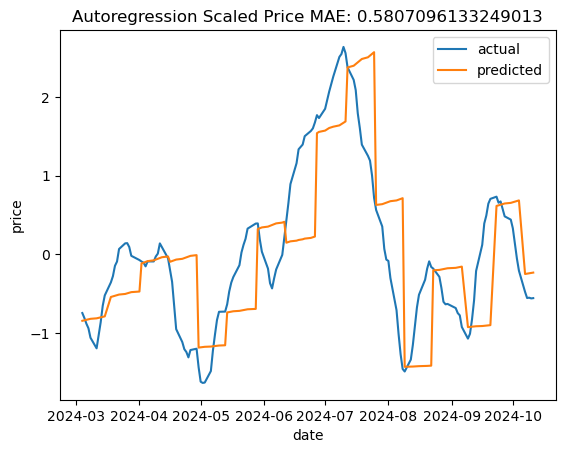

Autoregression Scaled Price MAE: 0.5807096133249013


<Figure size 640x480 with 0 Axes>

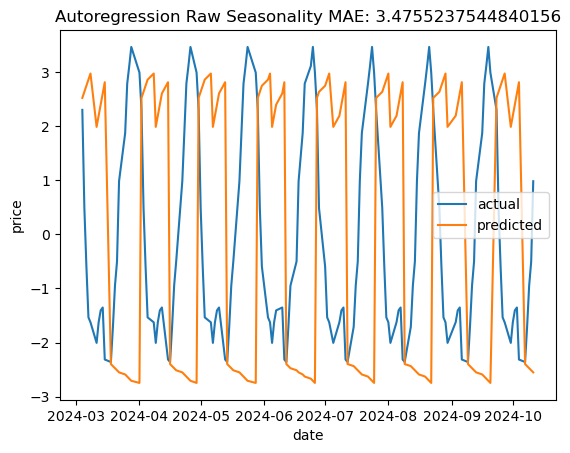

Autoregression Raw Seasonality MAE: 3.4755237544840156


<Figure size 640x480 with 0 Axes>

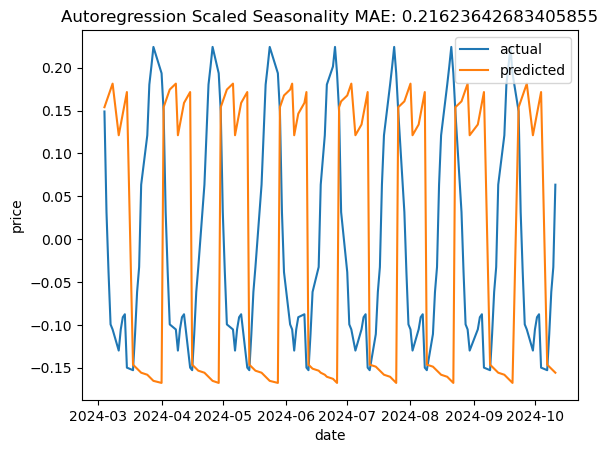

Autoregression Scaled Seasonality MAE: 0.21623642683405855


<Figure size 640x480 with 0 Axes>

In [3]:
viz.compareSimplePickleModel(data, 'Autoregression','ar_params')

## ARIMA

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


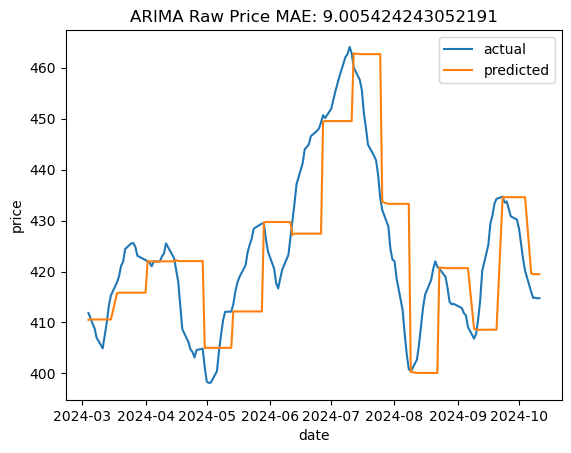

ARIMA Raw Price MAE: 9.005424243052191


<Figure size 640x480 with 0 Axes>

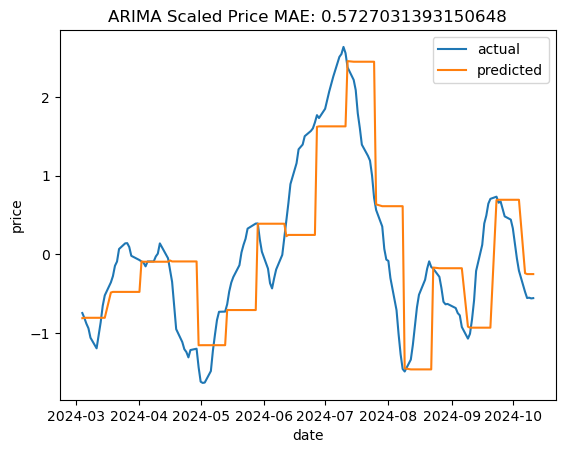

ARIMA Scaled Price MAE: 0.5727031393150648


<Figure size 640x480 with 0 Axes>

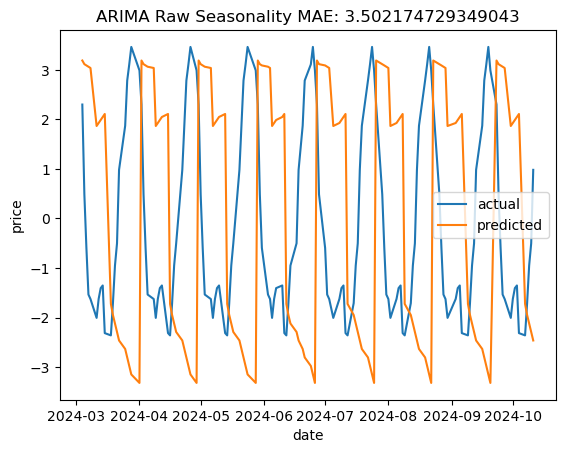

ARIMA Raw Seasonality MAE: 3.502174729349043


<Figure size 640x480 with 0 Axes>

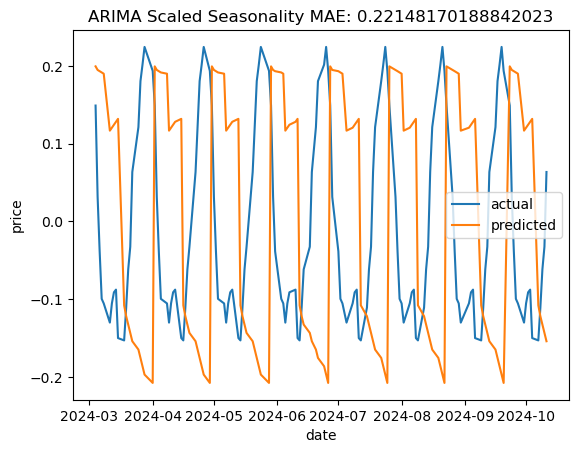

ARIMA Scaled Seasonality MAE: 0.22148170188842023


<Figure size 640x480 with 0 Axes>

In [4]:
viz.compareSimplePickleModel(data, 'ARIMA','arima_params')

## SARIMA

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


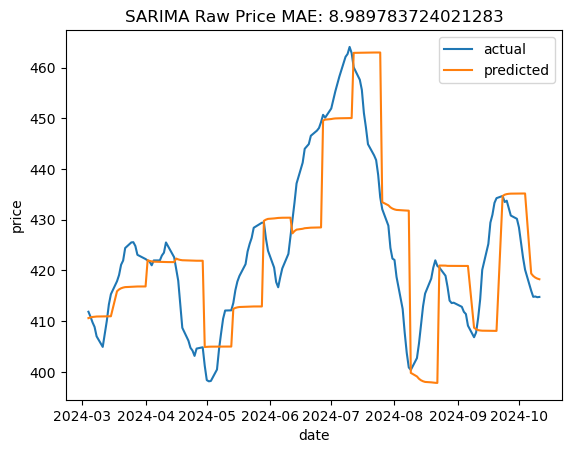

SARIMA Raw Price MAE: 8.989783724021283


<Figure size 640x480 with 0 Axes>

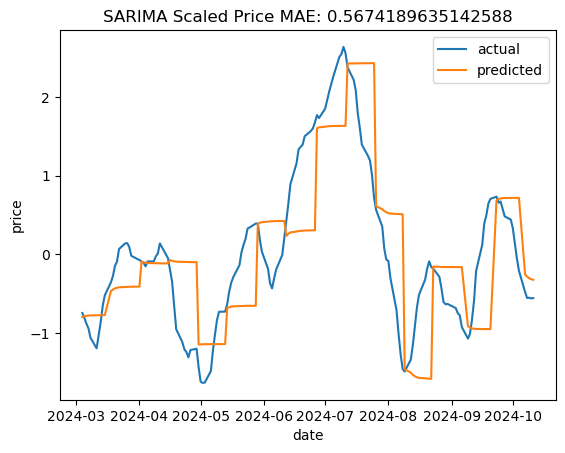

SARIMA Scaled Price MAE: 0.5674189635142588


<Figure size 640x480 with 0 Axes>

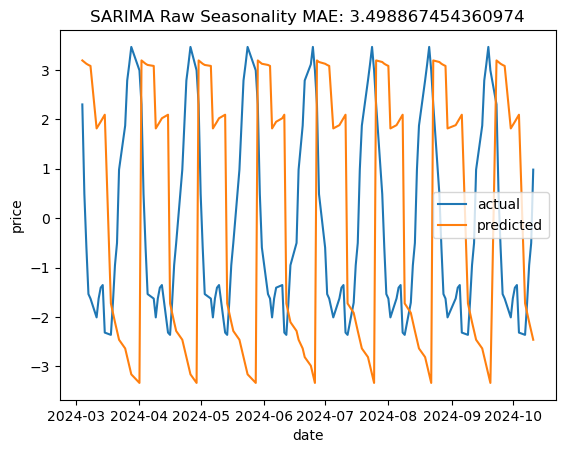

SARIMA Raw Seasonality MAE: 3.498867454360974


<Figure size 640x480 with 0 Axes>

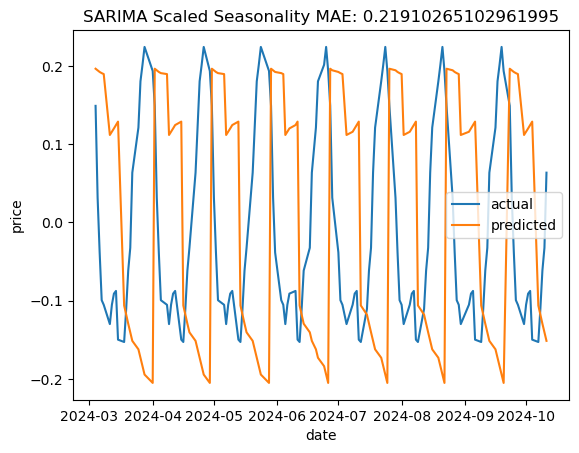

SARIMA Scaled Seasonality MAE: 0.21910265102961995


<Figure size 640x480 with 0 Axes>

In [5]:
viz.compareSimplePickleModel(data,'SARIMA')

## ExponentialSmoothing

len(fullPredict)  155
len(validation['y'])  155
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


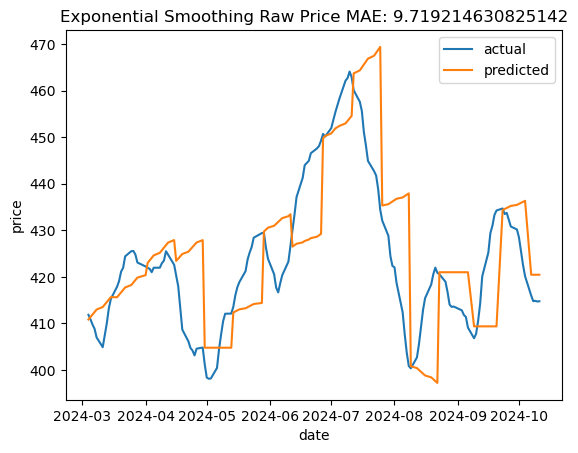

Exponential Smoothing Raw Price MAE: 9.719214630825142


<Figure size 640x480 with 0 Axes>

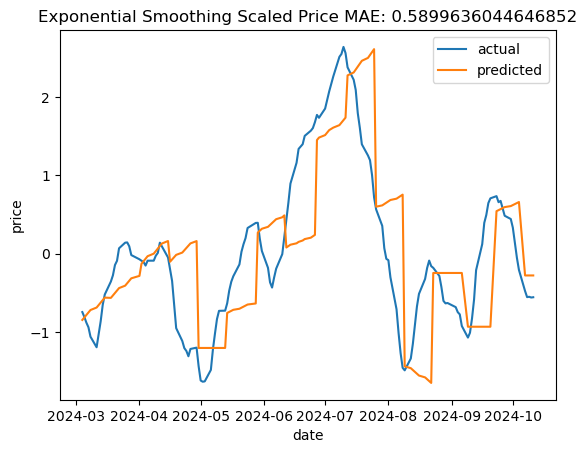

Exponential Smoothing Scaled Price MAE: 0.5899636044646852


<Figure size 640x480 with 0 Axes>

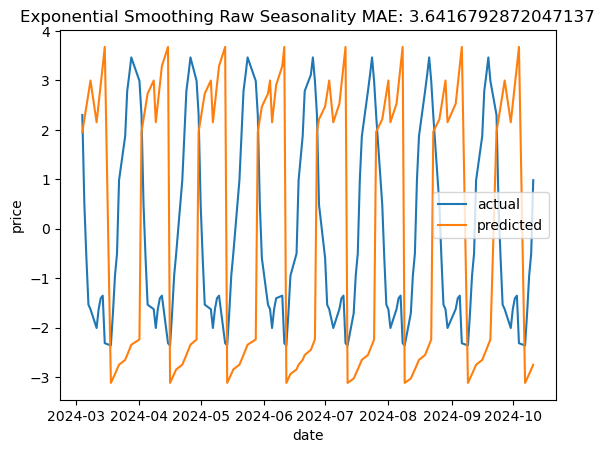

Exponential Smoothing Raw Seasonality MAE: 3.6416792872047137


<Figure size 640x480 with 0 Axes>

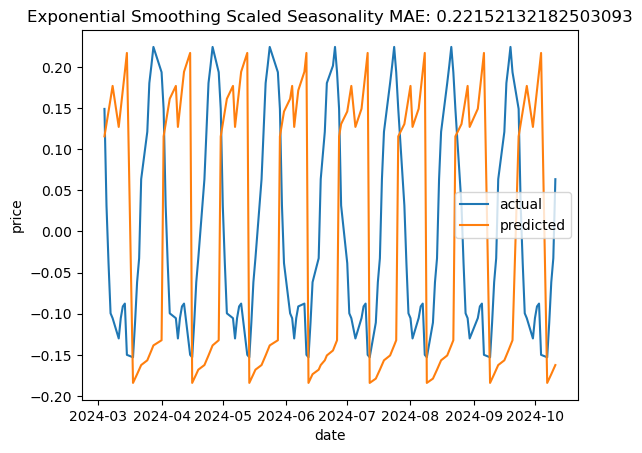

Exponential Smoothing Scaled Seasonality MAE: 0.22152132182503093


<Figure size 640x480 with 0 Axes>

In [6]:
viz.compareSimplePickleModel(data,'Exponential Smoothing','exponentialSmoothing_params')

## Prophet

00:06:10 - cmdstanpy - INFO - Chain [1] start processing
00:06:11 - cmdstanpy - INFO - Chain [1] done processing
00:06:11 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:12 - cmdstanpy - INFO - Chain [1] done processing
00:06:12 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:13 - cmdstanpy - INFO - Chain [1] done processing
00:06:13 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:14 - cmdstanpy - INFO - Chain [1] done processing
00:06:14 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:14 - cmdstanpy - INFO - Chain [1] done processing
00:06:14 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:16 - cmdstanpy - INFO - Chain [1] done processing
00:06:16 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:17 - cmdstanpy - INFO - Chain [1] done processing
00:06:17 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:18 - cmdstanpy - INFO - Chain [1] done processing
00:06:18 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:19 - cmdstanpy - INFO - Chain [1] done processing
00:06:19 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:20 - cmdstanpy - INFO - Chain [1] done processing
00:06:20 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:20 - cmdstanpy - INFO - Chain [1] done processing
00:06:21 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:22 - cmdstanpy - INFO - Chain [1] done processing
00:06:22 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:23 - cmdstanpy - INFO - Chain [1] done processing
00:06:23 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:23 - cmdstanpy - INFO - Chain [1] done processing
00:06:24 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:25 - cmdstanpy - INFO - Chain [1] done processing
00:06:25 - cmdstanpy - INFO - Chain [1] start processing


future.shape  (10, 1)


00:06:26 - cmdstanpy - INFO - Chain [1] done processing


future.shape  (5, 1)
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing
0.0% of data is missing


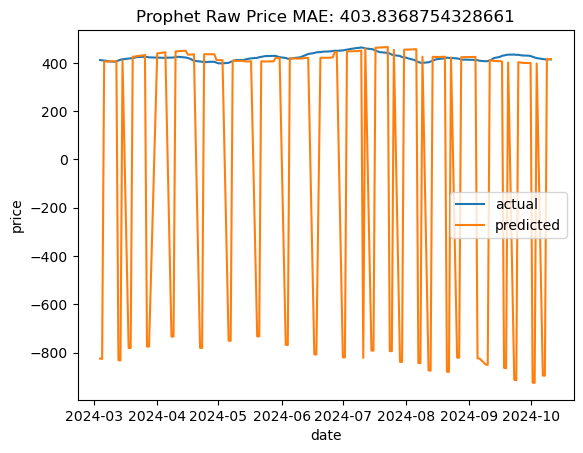

Prophet Raw Price MAE: 403.8368754328661


<Figure size 640x480 with 0 Axes>

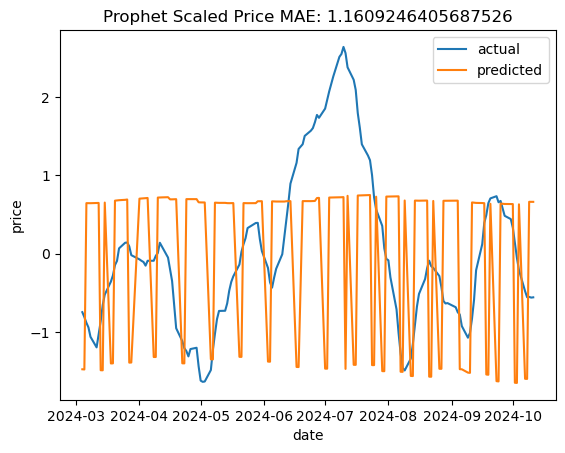

Prophet Scaled Price MAE: 1.1609246405687526


<Figure size 640x480 with 0 Axes>

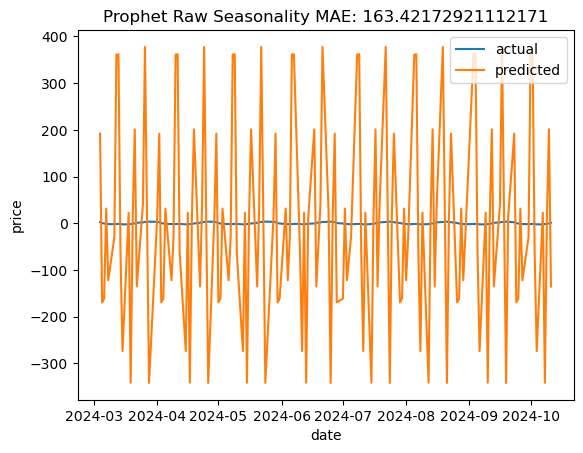

Prophet Raw Seasonality MAE: 163.42172921112171


<Figure size 640x480 with 0 Axes>

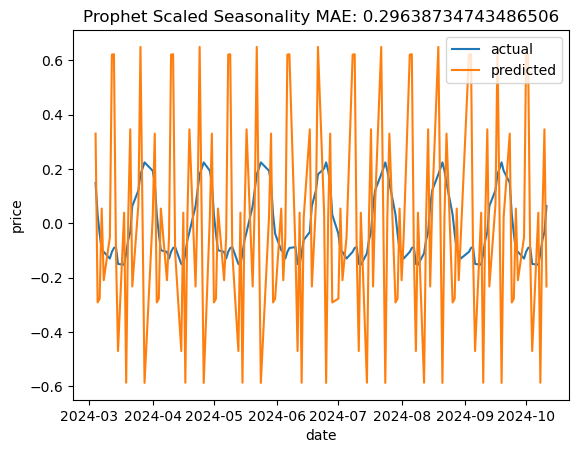

Prophet Scaled Seasonality MAE: 0.29638734743486506


<Figure size 640x480 with 0 Axes>

In [7]:
train,validation = loadData.splitData(data)
continuePrediction = True
fullPredict = []
periods = 10
while(continuePrediction):
    forecast = viz.makeProphetPrediction(train,periods)
    fullPredict += list(np.array(forecast['yhat']).reshape(-1,))
    train = data.iloc[:(train.shape[0]+periods)]
    if (train.shape[0]+periods >= data.shape[0]):
        periods = data.shape[0] - train.shape[0]
        forecast = viz.makeProphetPrediction(train,periods)
        fullPredict += list(np.array(forecast['yhat']).reshape(-1,))
        continuePrediction = False      
#fig = model.plot(forecast)
#plt.show()
viz.compare(validation['ds'],validation['y'],fullPredict,'Prophet')

## LSTM

In [8]:
model = keras.models.load_model('../Models/LSTM_.h5')
XTest, yTest = loadData.processDataForLSTM(test['y'])
yPredict = model.predict(XTest)
viz.compare(date[-len(yTest):],yTest, yPredict ,'LSTM')

2024-12-16 00:06:27.043268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-16 00:06:27.044312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-16 00:06:27.044869: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

NameError: name 'test' is not defined